In [1]:
# CNN =  (Covolution Filters, Padding Layers, Pooling) + Fully Connected Network (ANN)

# (Covolution Filters, Padding Layers, Pooling) = Feature Descriptor | Extractor

# Feature Descriptor - Image --> FD | FE --> Feature Map --> flatten(converting feature map into 1D array) --> 1D --> ANN

In [3]:
# Need for Transfer Learning

# RESOURCE MANAGEMENT --> Training CNN model on GPU and Testing (GPU and CPU)

# GPU - A100 Memory of 96.5 - 98 gb) - 3 - 5 lacs 
# Azure or AWS --> 15 lacs

# 5 Datascienits
# 5 Day week

# allocating the days for training - (limited time to train your model)
# limited time --> best model out of it 

# we need lot of data and then proper architecture to build a good model

# Building Architeture -- Research Domain
# Rather than buildin model from scratch -- Pretrained model or Transfer Learning


# WHY ---?
# Feature Descriptor - Convolution Filters, Padding Layers, Pooling layers

# only Convolution Filter is responsible for learning the features (shape,texture,size) of the object
# "weights" in CF will be initiliazed randomly 
# 2 Dimensional Data
# aggregation + activation + bias

# Padding Layers - preserve the edges | preserve the shape of the feature map - weights
# Pooling Layers - important pixels (pixel intensity) - weights

In [9]:
import cv2
d = cv2.imread(r"C:\Users\DELL E5490\Downloads\xyz.jpg")
d = d.reshape(-1)

<Axes: ylabel='Frequency'>

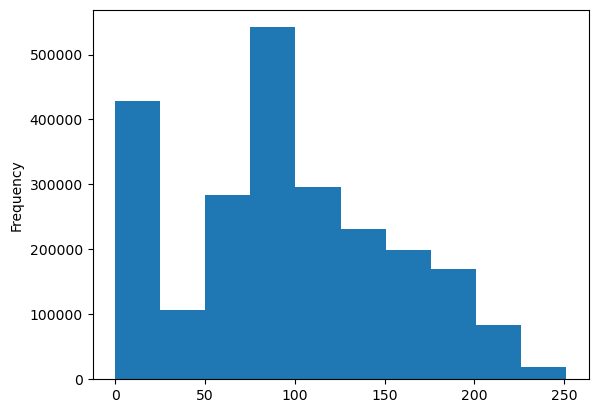

In [11]:
import pandas as pd

pd.Series(d).plot.hist()


# single channel - Gray Scale Image or Binary Imae
# (0-255)
# (0- black)
# (255 - white)

# (127 - gray color)

# color image - 3 channels (RGB,BGR,BGRA)

# channe1 - (0-255) R 
# channel2 - (0-255) G 
# channel3 - (0-255) B 


# convolution filter  looks like a matrix - rows and cols

# convultion from scratch - it doesnt work for every dataset

# pretrained model - (architecture is predefined) - Alexnet, Resnet,VGG16, VGG50

# using this pretrained model well trained the model on our dataset?
# convolution filters are already trained

# training weights of convolution layers and weights of ANN - weeks or months of time

# Pretrained models are trained on Imagenet Dataset - 1000 Classes

In [ ]:
# Transfer Learning comes in 2 types

# Type-1 = not train weights of convolution layers or filters ,but youll train weights of ANN 
# Type-2 = wont train some part of convolution layers or filters youll be training some part of con filters along with weights of ANN

In [ ]:
# Image Classification - samplenetwork, pretrained_model, transfer_learnin (type-1 and type -2)

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, Model

# Load MobileNetV2 without the top layers, setting input shape
mobilenet_v2_without_top = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in mobilenet_v2_without_top.layers:
    layer.trainable = False

for layer in mobilenet_v2_without_top.layers:
    if layer.name == "Conv_1_bn":
        layer.trainable = True

C:\Users\DELL E5490\AppData\Local\Temp\ipykernel_15188\2846174237.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_v2_without_top = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [15]:
# Define the input for the new model
inputs = mobilenet_v2_without_top.input
flatten = layers.Flatten()(mobilenet_v2_without_top.output)
x = layers.Dense(128, activation="relu")(flatten)  # Typically larger than 2 neurons for hidden layers
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 128, 128, 32)      │             864 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 128, 128, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 128, 128, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 128, 128, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 128, 128, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 128, 128, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 128, 128, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 128, 128, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 128, 128, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 128, 128, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 128, 128, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 129, 129, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 64, 64, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 12,744,001 (48.61 MB)

 Trainable params: 10,488,577 (40.01 MB)

 Non-trainable params: 2,255,424 (8.60 MB)

In [16]:
# Freezing a layer in feature desc or head 

#  Total params: 12,744,001 (48.61 MB)
#  Trainable params: 10,488,577 (40.01 MB)
#  Non-trainable params: 2,255,424 (8.60 MB)

# Freezing the complete network 

#  Total params: 12,744,001 (48.61 MB)
#  Trainable params: 10,486,017 (40.00 MB)
#  Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Same Dataset

# Transferlearning type 1 with atleast 3 layers in Fully connected network
# Transferlearning type 2 with atleast 3 layers in Fully connected network + 3 layers in FD (make them trainable)

# report on trainable parameters without transferlearning, with transtype-1,transtpye-2
# train vs val loss graph
# time taken for training and time taken for inference 